## Soft margin


In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.calibration import LinearSVC
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np


iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ]
)
svm_clf.fit(X, y)


,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## nonlinear


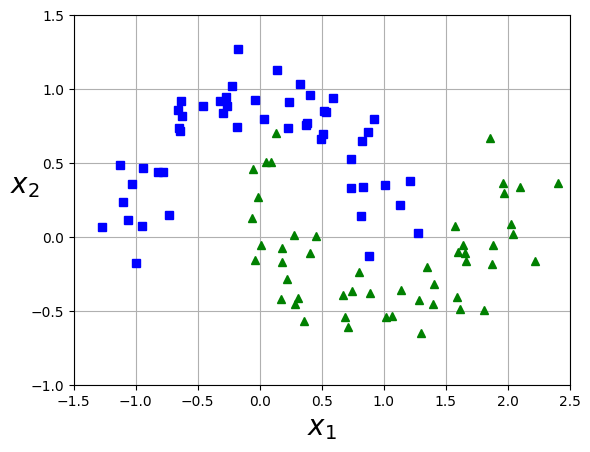

In [4]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures


polynomial_svm_clf = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000)),
    ]
)

polynomial_svm_clf.fit(X, y)


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [6]:
print(polynomial_svm_clf.predict([[0.4, 0.1]]))
print(polynomial_svm_clf.predict([[-0.4, 1.5]]))

[1]
[0]


In [7]:
from sklearn import pipeline
from sklearn.svm import SVC


poly_kernel_svm_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
    ]
)
poly_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


In [8]:
rbf_kernel_svm_clf = Pipeline(
    [("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))]
)
rbf_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


In [9]:
from sklearn.svm import LinearSVR


svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

,epsilon,1.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'
,fit_intercept,True
,intercept_scaling,1.0
,dual,'auto'
,verbose,0
,random_state,None
,max_iter,1000


In [10]:
from sklearn.svm import SVR


svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1
